In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [2]:
np.random.seed(0)

In [3]:
X_data, y_data = make_blobs(n_samples=5000, centers=[[4, 4], [-2, -1], [2, -3], [1, 1]], cluster_std = 0.9, random_state=0)
print(X_data)
print(y_data)

[[-1.82150565  0.07098024]
 [ 2.16732621 -2.93199608]
 [ 0.8465158  -3.26075305]
 ...
 [ 3.29772603  4.24400152]
 [-1.69503125 -0.29979681]
 [-1.64362141  0.63035513]]
[1 2 2 ... 0 1 1]


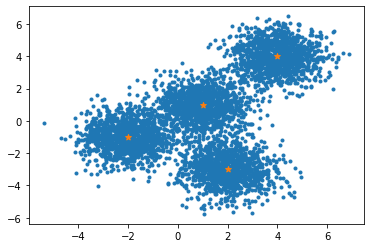

In [4]:
plt.scatter(X_data[:, 0], X_data[:, 1], marker = '.')
plt.scatter([4, -2, 2, 1], [4, -1, -3, 1], marker = '*')

In [5]:
k_means = KMeans(init = 'k-means++', n_clusters = 4, n_init = 12)

In [6]:
k_means.fit(X_data)

KMeans(n_clusters=4, n_init=12)

In [7]:
k_means_labels = k_means.labels_
k_means_labels
print(type(k_means_labels))

<class 'numpy.ndarray'>


In [8]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 1.99741008, -3.01666822],
       [ 0.96900523,  0.98370298]])

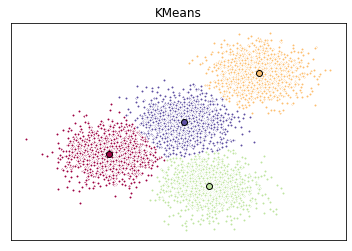

In [9]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    # my_members ==> True/False
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X_data[my_members, 0], X_data[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()